<a href="https://colab.research.google.com/github/naghma28/airbnb-booking-analysis/blob/main/Airbnb_Bookings_Analysis_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* Correlation between different variables
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Exploratory Data Analysis and Visualization of Airbnb Dataset**

In this project, we will analyze the data descriptively and statistically to determine how the variables are correlated to generate hypotheses useful for future decision-making. It's imperative to analyze the data carefully in order to obtain meaningful insights that can assist in making better business decisions and understanding customer and host behavior. The dataset comprises millions of listings on the Airbnb platform. Airbnb offers short-term homestays and experiences on an online marketplace.

To work on data, we will be using different tools that are very common for performing simple and complex analyses, like classifications of variables, histograms, textual mining, and measures of central tendency.

# **Importing important libraries and loading data**

In [4]:
import numpy as np
import pandas as pd

from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from wordcloud import WordCloud, ImageColorGenerator

In [5]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#read file
filepath = '/content/drive/MyDrive/ColabNotebooks/Capstone Project/1. EDA Capstone /Airbnb Data/Copy of Airbnb NYC 2019.csv'
arbnb_df = pd.read_csv(filepath)

# **Performing some basic analysis to get infromation about the data**

In [7]:
arbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
arbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
arbnb_df.shape

(48895, 16)

### Examining categorical data

In [10]:
arbnb_df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [11]:
len(arbnb_df.neighbourhood.unique())

221

In [12]:
arbnb_df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## **Inference**

1. Interestingly, we can observe that we have a good number of different data 
types with a mix of categorical and numerical data.
2. In total, there are 16 columns and 48895 rows which comprises ample information on which we can perform our in-depth analysis.
3. We can also see from the above, there are some missing NaN values that will require cleaning and handling.
4. We have a list of 5 categorical unique 'Neighbourhood_group' which are 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'.
5. There are 221 categorical unique 'Neighbourhood' data.
6. We have prominently 3 different room types i.e 'Private room', 'Shared room' and Entire home/apt.

# **Creating copy of data file on which we will perform analysis**

In [13]:
df = arbnb_df.copy()

# **Cleaning the data for further predictive analysis**

1. Remove NaN values from the data
2. Replace all the missing values with 0
3. Dropping columns that are not required and are insignificant for our analysis

Before cleaning the data, let's find out the total number of null values across different columns in the dataset.

In [14]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

From the above information, last_review is in the form of a date and if there is no value present, it simply means there were no reviews for the listing so the date does not exist. For 'reviews_per_month', we can append the missing values with 0.0 (float64). Hence, if the 'number_of_review' is 0, it can be inferred that the review rate is also 0.0.

In [15]:
df.dropna(how='any',inplace=True)

In [16]:
df.fillna({'reviews_per_month':0.0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

In [17]:
df.drop(['id','host_name','last_review'], axis=1, inplace=True)

# **Correlation between different variables**

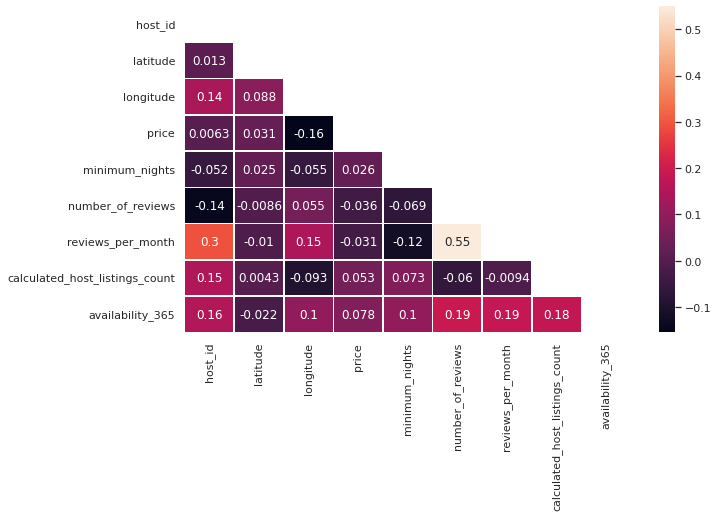

In [18]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = corr, mask = mask, linewidth = 0.5, annot = True)

# **Inference**

1. Using the color variation, we can depict the correlation between the variables on both axes. On either side of the axis, darker colors indicate a negative correlation between both variables.
2. From the correlation matrix above, it is visible that 'number_of_reviews' and 'reviews_per_month' are positvely correlated as one can expected higher rate of reviews per month, if there is more number of reviews. 
3. There is a negative correlation between 'price' and 'longitude' since the higher prices are usually found in busier places.
4.In addition, we can observe a negative correlation between 'price' and 'number_of_reviews', which leads to the conclusion that properties with lower prices are more likely to be booked and have more reviews.

# **Data visualization about different hosts and areas**

Let's dive deep into the dataset and derive some meaningful insights. Firstly, let's look out for Host_ids which have a maximum number of listings on the Airbnb platform.

In [19]:
top_host = df.host_id.value_counts().head(10)
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_Id', 'host_id':'Prop_Count'}, inplace=True)
top_host_df

,Host_Id,Prop_Count
0,219517861,207
1,61391963,79
2,16098958,61
3,137358866,51
4,7503643,49
5,190921808,46
6,30283594,43
7,1475015,42
8,120762452,40
9,2119276,39


Text(0.5, 0, 'Host Ids')

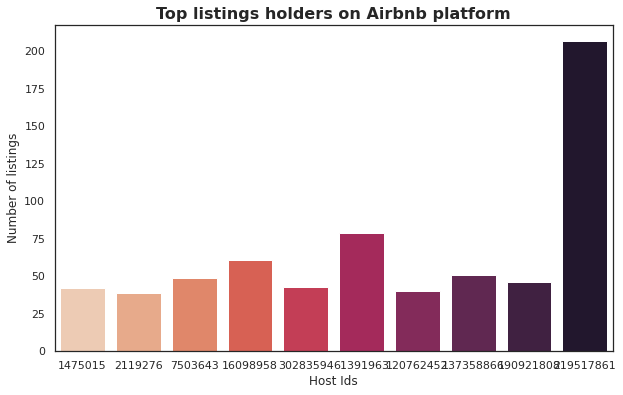

In [20]:
mx = sns.barplot(x='Host_Id', y = 'Prop_Count', data = top_host_df, palette='rocket_r')

mx.set_title('Top listings holders on Airbnb platform', weight='bold', fontsize = 16)
mx.set_ylabel('Number of listings')
mx.set_xlabel('Host Ids')

# **Inference**

1. We can see our top 10 hosts have a good deal of listings on the Airbnb platform.
2. The first host has more than 300 properties listed on the platform.

# **Mapping neighbourhood group**

Now lets look out at 'the number of listings present across different neighbours groups.

In [21]:
area_wise_prop = df.groupby(['neighbourhood_group']).agg({'calculated_host_listings_count': ['count']})
area_wise_prop.columns = ['total_property_count']
area_wise_prop = area_wise_prop.reset_index()
area_wise_prop

,neighbourhood_group,total_property_count
0,Bronx,875
1,Brooklyn,16439
2,Manhattan,16621
3,Queens,4572
4,Staten Island,314


Text(0, 0.5, 'No. of properties')

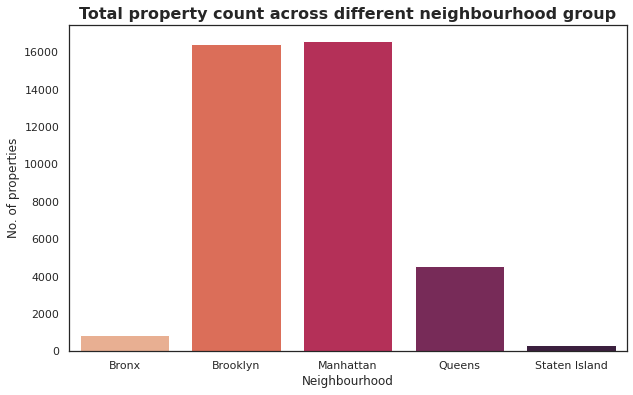

In [22]:
x = area_wise_prop['neighbourhood_group']                                        
y = area_wise_prop['total_property_count']

ar = sns.barplot(x=x, y = y, data = top_host_df, palette='rocket_r')

ar.set_title("Total property count across different neighbourhood group", fontsize = 16 , weight = 'bold')
ar.set_xlabel('Neighbourhood')
ar.set_ylabel('No. of properties')


# **Inference**

1. Based on the bar graph above, we can say that Manhattan and Brooklyn are the most popular neighborhood, followed by Queens. Clearly, Manhattan is among the world's top commercial, financial, and cultural centers, which is why there are so many listings here.
2. Staten Island and the Bronx, not very famous, have the lowest number of listings.

We have already seen listings present across 5 unique neighborhood groups. Let's look at listing distribution across latitude and longitude with different room types.


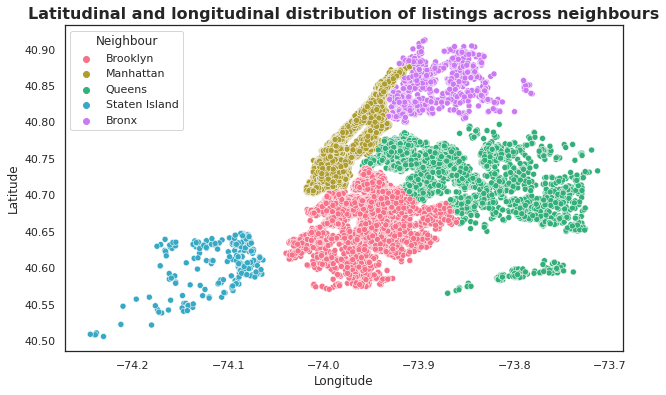

In [23]:
lat = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood_group, palette="husl")

lat.set_title('Latitudinal and longitudinal distribution of listings across neighbours', weight='bold', fontsize = 16)
lat.set_xlabel('Longitude')
lat.set_ylabel('Latitude')
lat.legend(loc='upper left', title='Neighbour')

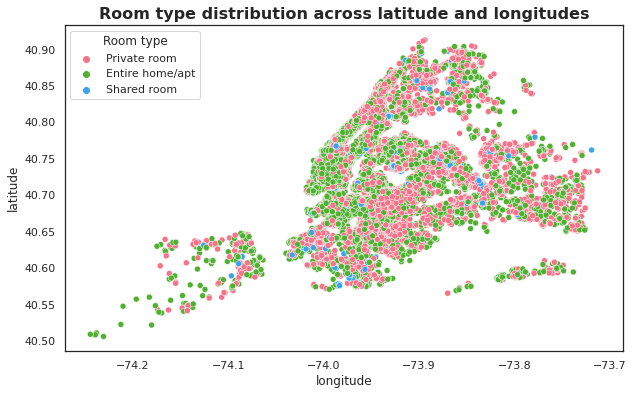

In [24]:
rm = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.room_type, palette="husl")
rm.set_title('Room type distribution across latitude and longitudes', weight='bold', fontsize = 16)
rm.legend(loc='upper left', title='Room type')

# **Inference**

1. It appears there are a few scattered listings across Queens and Staten Island. In contrast, Brooklyn and Manhattan have a crowded listing situation in their respective regions. 
2. In terms of distribution of room types, we can see there is a good mix of different types available across the region. When compared with shared rooms, there is dominancy in private rooms and entire homes categories.

# **Different types of room distribution**

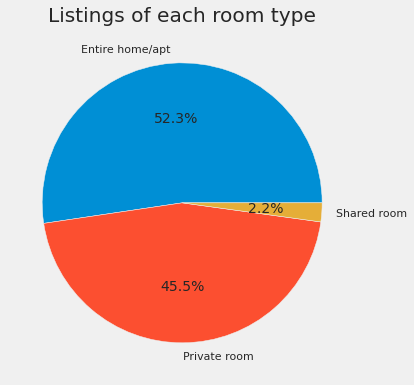

In [25]:
plt.style.use('fivethirtyeight')
p = plt.pie(df.room_type.value_counts(), labels= df.room_type.value_counts().index, autopct='%1.1f%%')
plt.title("Listings of each room type")
plt.show()

In [26]:
room_type_var = df.groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()
room_type_var

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,308,524,43
Brooklyn,8159,7990,290
Manhattan,9962,6303,356
Queens,1742,2678,152
Staten Island,150,159,5


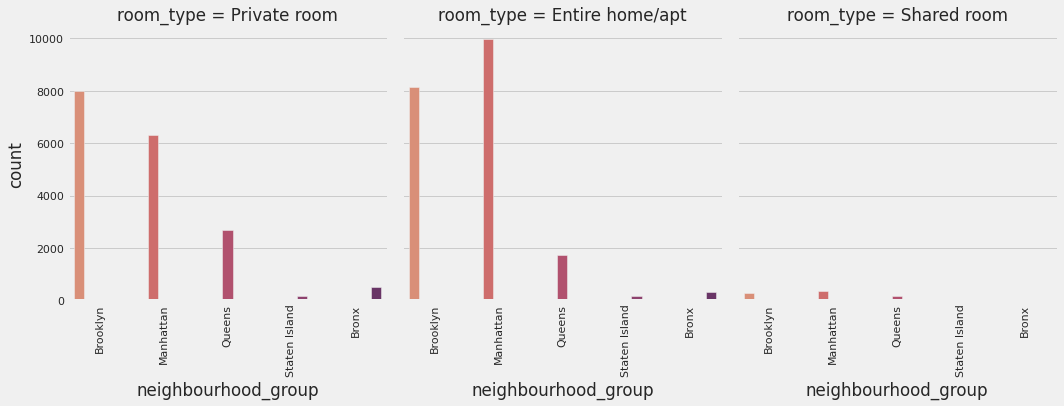

In [27]:
r = sns.catplot(data = df, x='neighbourhood_group', hue='neighbourhood_group', col='room_type', palette='flare',kind="count")
r.set_xticklabels(rotation=90)
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

# **Inference**

1. There is a very clear percentage division of the three different room types across the region, with 'Entire home/apt' accounting for 52.3% of listings, and shared rooms representing just 2.2%.

# **Top 10 neighbourhoods with maximum listings**

Since we have more than two hundred neighbours listed out, so we will be taking a glimpse of only the top ten neighbours who has more number of listings.

In [28]:
top_neigh = df.groupby(['neighbourhood']).agg({'calculated_host_listings_count':['count']})
top_neigh.columns = ['total_prop']
top_neigh = top_neigh.sort_values(by='total_prop', ascending=False).head(10)
top_neigh.reset_index()

,neighbourhood,total_prop
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265
9,Midtown,986


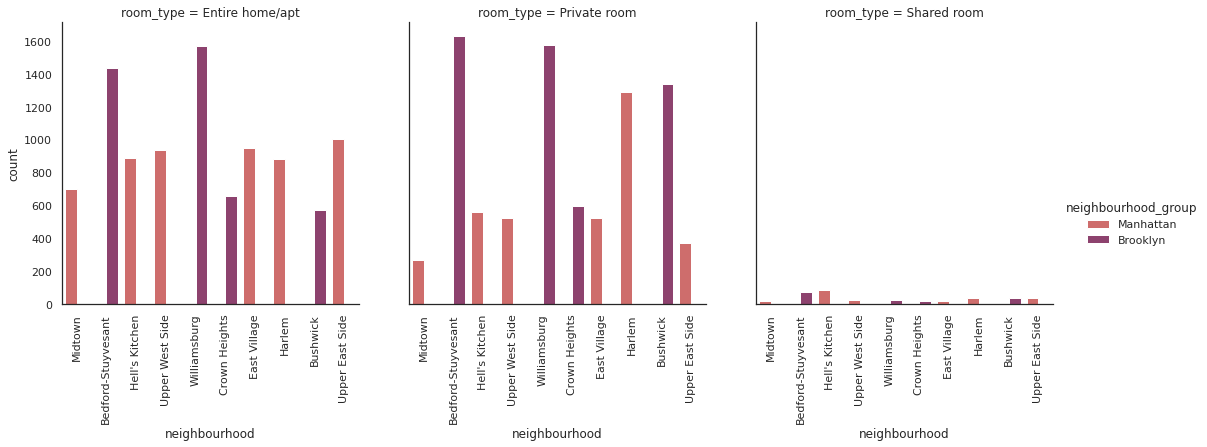

In [29]:
top_neighours = df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
s = sns.catplot(data = top_neighours, x='neighbourhood', hue='neighbourhood_group', col='room_type', palette='flare',  kind='count')
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")
s.set_xticklabels(rotation=90)

# **Inference**

1. One thing to note is that we only have two boroughs listed among the top ten: Manhattan and Brooklyn. For Brooklyn borough, Williamsburg and Bedford-Stuyvesant are more popular. 
2. It is surprising to see that 'Shared rooms' barely make the top 10 neighbourhoods.

# **Analyzing the number of reviews and room availability with respect to price**

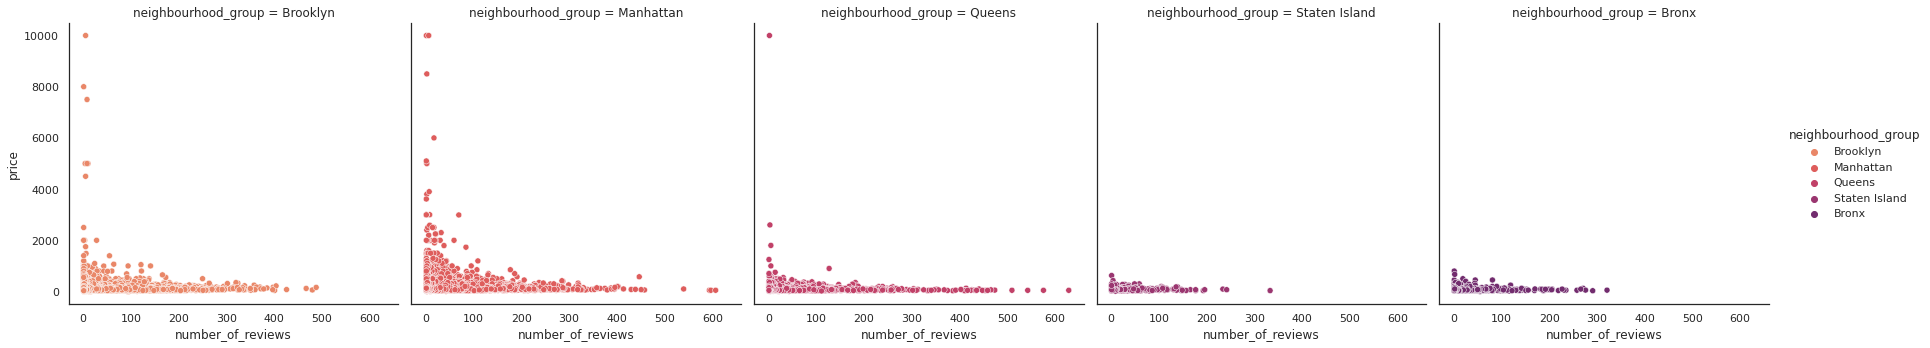

In [30]:
sns.relplot(x=df.number_of_reviews, y=df.price, hue=df.neighbourhood_group, col=df.neighbourhood_group, palette="flare")
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

Let's have a more closer look, taking price range less than 400 dollars.

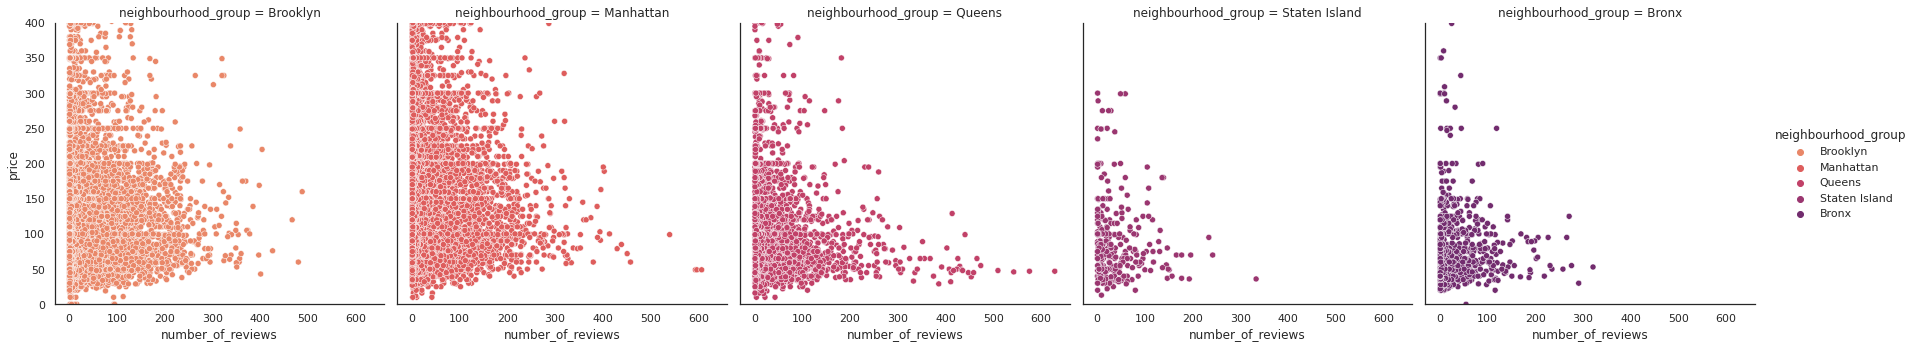

In [31]:
sns.relplot(x=df.number_of_reviews, y=df.price, hue=df.neighbourhood_group, col=df.neighbourhood_group, palette="flare")
sns.set(rc={'figure.figsize':(10,6)})
plt.ylim(0,400)
sns.set(style="white")

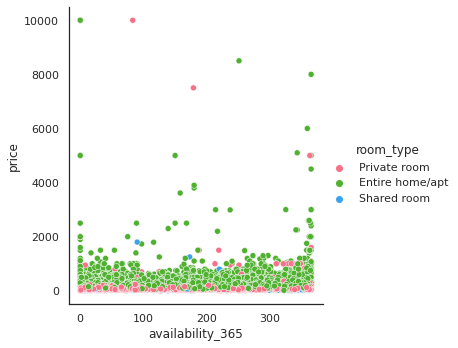

In [32]:
sns.relplot(x=df.availability_365, y=df.price, hue=df.room_type, palette="husl")
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

# **Inference**

1. From the first graph,  we can see a negative relationship between price and the number of reviews. There are more reviews for properties with lower prices since they are booked more frequently. 
2. According to the second graph, the price of properties does not vary much in relation to their availability.

# **Density and distribution of prices for each neighbourhood using central tendency**

In [33]:
price_var = df.groupby(['neighbourhood_group']).agg({'price': ['median', 'mean','min', 'max']}) 
price_var.columns = ['median_price', 'mean_price', 'min_price', 'max_price']                    
price_var = price_var.reset_index()
price_var

,neighbourhood_group,median_price,mean_price,min_price,max_price
0,Bronx,65.0,79.558857,0,800
1,Brooklyn,94.0,121.463289,0,10000
2,Manhattan,140.0,180.071596,10,9999
3,Queens,72.0,95.783683,10,10000
4,Staten Island,75.0,89.964968,13,625


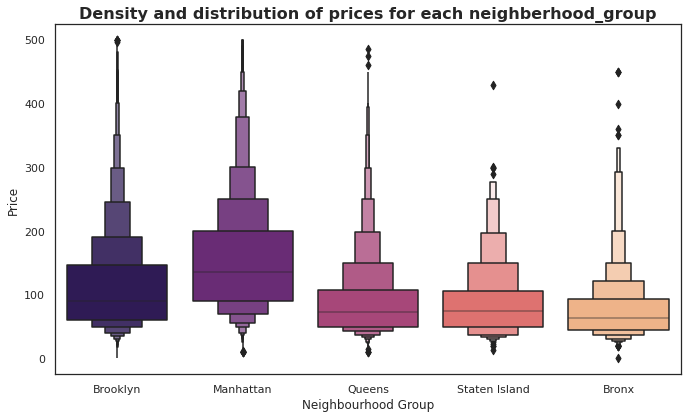

In [34]:
rev_price = df[df.price  < 500]

pv = sns.boxenplot(x='neighbourhood_group', y='price', data= rev_price , palette = 'magma')
pv.set_title('Density and distribution of prices for each neighberhood_group', weight='bold', fontsize = 16)
pv.set_ylabel('Price')
pv.set_xlabel('Neighbourhood Group')
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

# **Inference**

1. With an average price of 150 dollars, Manhattan has the highest price range and is the most expensive, followed by Brooklyn with an average of 90 dollars. It is very obvious that Manhattan is one of the most expensive places in the world.
2. Bronx has the cheapest listings of all.
3. The data contains some outliers because of which there is a variation between mean and median values.

Following our analysis of that density and distribution of prices, let's take a closer look at price variation. Our price data shows outliers, which we can further eliminate to explore in more detail.

# **Frequency of listings with respect to the price**

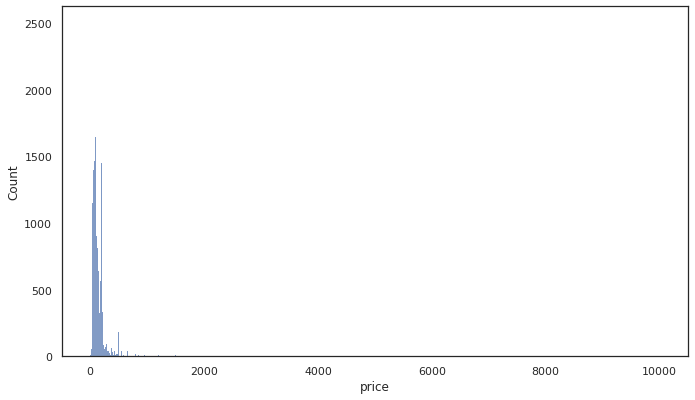

In [35]:
sns.histplot(data=df, x="price")
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

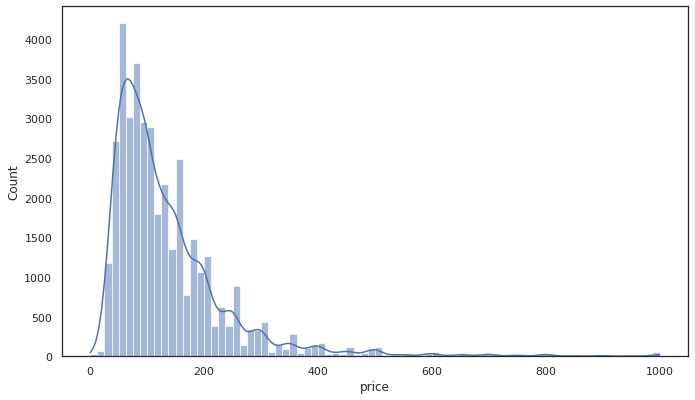

In [36]:
price_range = df[df['price'] <= 1000]
sns.histplot(data=price_range, x="price", kde=True, bins = 80)
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

# **Inference**

1. By using the histogram, we can now see how prices are distributed. We have a large number of values concentrated below 200 dollars.

# **Frequency of listings with respect to the minimum number of nights**

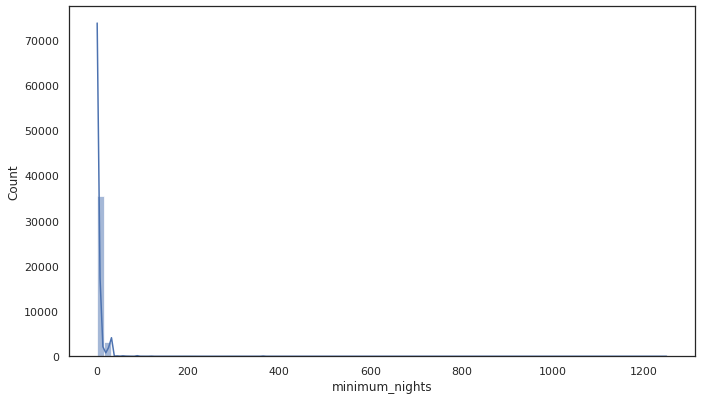

In [37]:
sns.histplot(data=df, x="minimum_nights", kde=True, bins = 80)
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

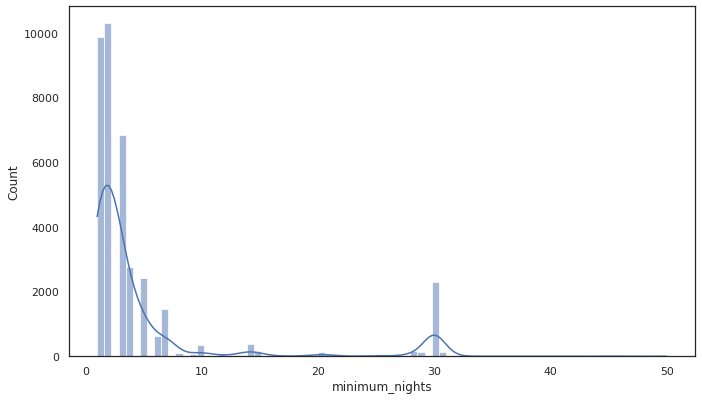

In [38]:
min_night = df[df['minimum_nights'] <= 50]
sns.histplot(data=min_night, x="minimum_nights", kde=True, bins = 80)
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

# **Inference**

1. In this case, most of the listings have listed out their minimum night record below 10. One unusual thing to note here is the peak in the listing frequency for the minimum night of 30. It is possible that some owners have listed their properties on a monthly rental basis, which may explain this.

# **Traffic in different areas based on number of reviews**

In [39]:
traffic_ar = df.groupby(['neighbourhood_group']).agg({'number_of_reviews': ['sum']})
traffic_ar.columns = ['review_count']
traffic_ar = traffic_ar.reset_index()
traffic_ar.head(5)

,neighbourhood_group,review_count
0,Bronx,28334
1,Brooklyn,486174
2,Manhattan,454126
3,Queens,156902
4,Staten Island,11541


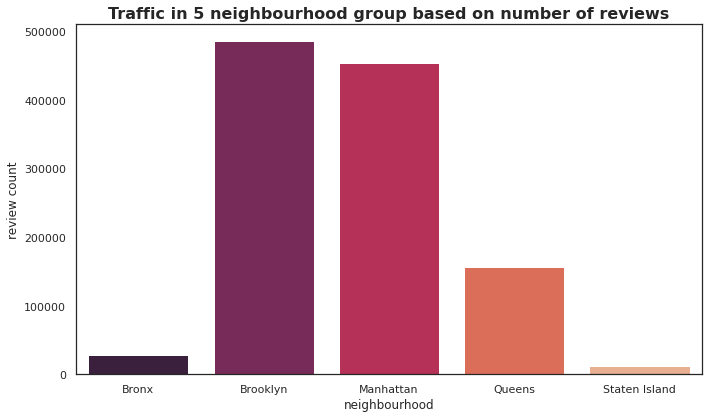

In [40]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

trf =sns.barplot(data=traffic_ar, x="neighbourhood_group", y="review_count", palette='rocket' )
trf.set_title('Traffic in 5 neighbourhood group based on number of reviews', weight='bold', fontsize = 16)
trf.set_ylabel('review count')
trf.set_xlabel('neighbourhood')
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

# **Inference**

1. In our earlier analysis, we saw that Manhattan had the most listings, but that traffic in Manhattan is somewhat lower compared to Brooklyn, which has the highest number of reviews on average. This may be due to differences in the price distribution between Manhattan and Brooklyn. In Manhattan, rooms average 150 dollars, while in Brooklyn they average 90 dollars.
2. There are not many reviews in the Bronx and Staten Island.

# **Textual Data Mining to find out the host's mindset**

We will be using the Wordcloud library for textual data mining on the name column. Word clouds use frequency counts of the words as input and return a beautiful graphic display of the most frequently occurring words with their size proportional to their relative frequency. We can see a large number of naming patterns used by our hosts for their listings. Using the word cloud as a tool for analysis, we can uncover some interesting trends that may help us understand our hosts' behavior and mindset.


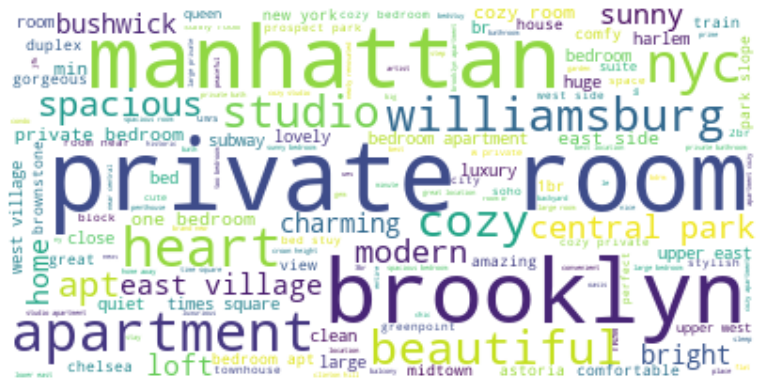

In [41]:
text = ' '.join(str(n).lower() for n in df.name)

wordcloud = WordCloud(max_words=200, background_color = 'white').generate(text)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Inference**

1. Based on the above resultant word cloud, it is evident that hosts are using simple and location-oriented keywords to differentiate their listings. In this case, location is the key indicator, since the words "Manhattan" and "Williamsburg" are prominently displayed. 
2. Furthermore, we can see some adjectives such as "beautiful", "quiet", "cozy", and "gorgeous" bedrooms/apartments, which indicates that visitor comfort is a top priority. 
3. Several mentions of "private rooms" indicate the popularity of this room type in the city.

# **Top 10 key points to take away**

1. Our top ten hosts have a substantial number of listings, with the top host having over 300.
2. The listings spread across five NYC boroughs, with Manhattan having the largest proportion, followed by Brooklyn and Staten Island having the least.
3. The percentage distribution of three unique room types was as follows: 
  *   Entire home/apt - 52.3%
  *   Private room - 45.5%
  *   Shared room - 2.2%.
4. Williamsburg and Bedford-Stuyvesant were found to be more popular neighbourhoods in Brooklyn borough.
5.A statistical analysis shows that Manhattan has the most expensive price range with an average of 150 dollars followed by the Brooklyn with an average of  90 dollars. 
6.Bronx provides the cheapest accommodation among all.
7. The majority of the listings have a minimum night record below 10 but there is a considerate frequency of listings for the minimum night of 30.
8. Brooklyn has more traffic than Manhattan which might be due to differences in the price distribution.
9.It is evident that hosts are using simple and location-oriented keywords to differentiate their listings. 
10. Several mentions of "private rooms" indicate the popularity of this room type in the city.
